In [13]:
import os

if not os.path.abspath("").endswith("src"):
    notebook_dir = os.path.join(os.path.abspath(""), "..")

    # Change the CWD to the notebook's directory
    %cd $notebook_dir

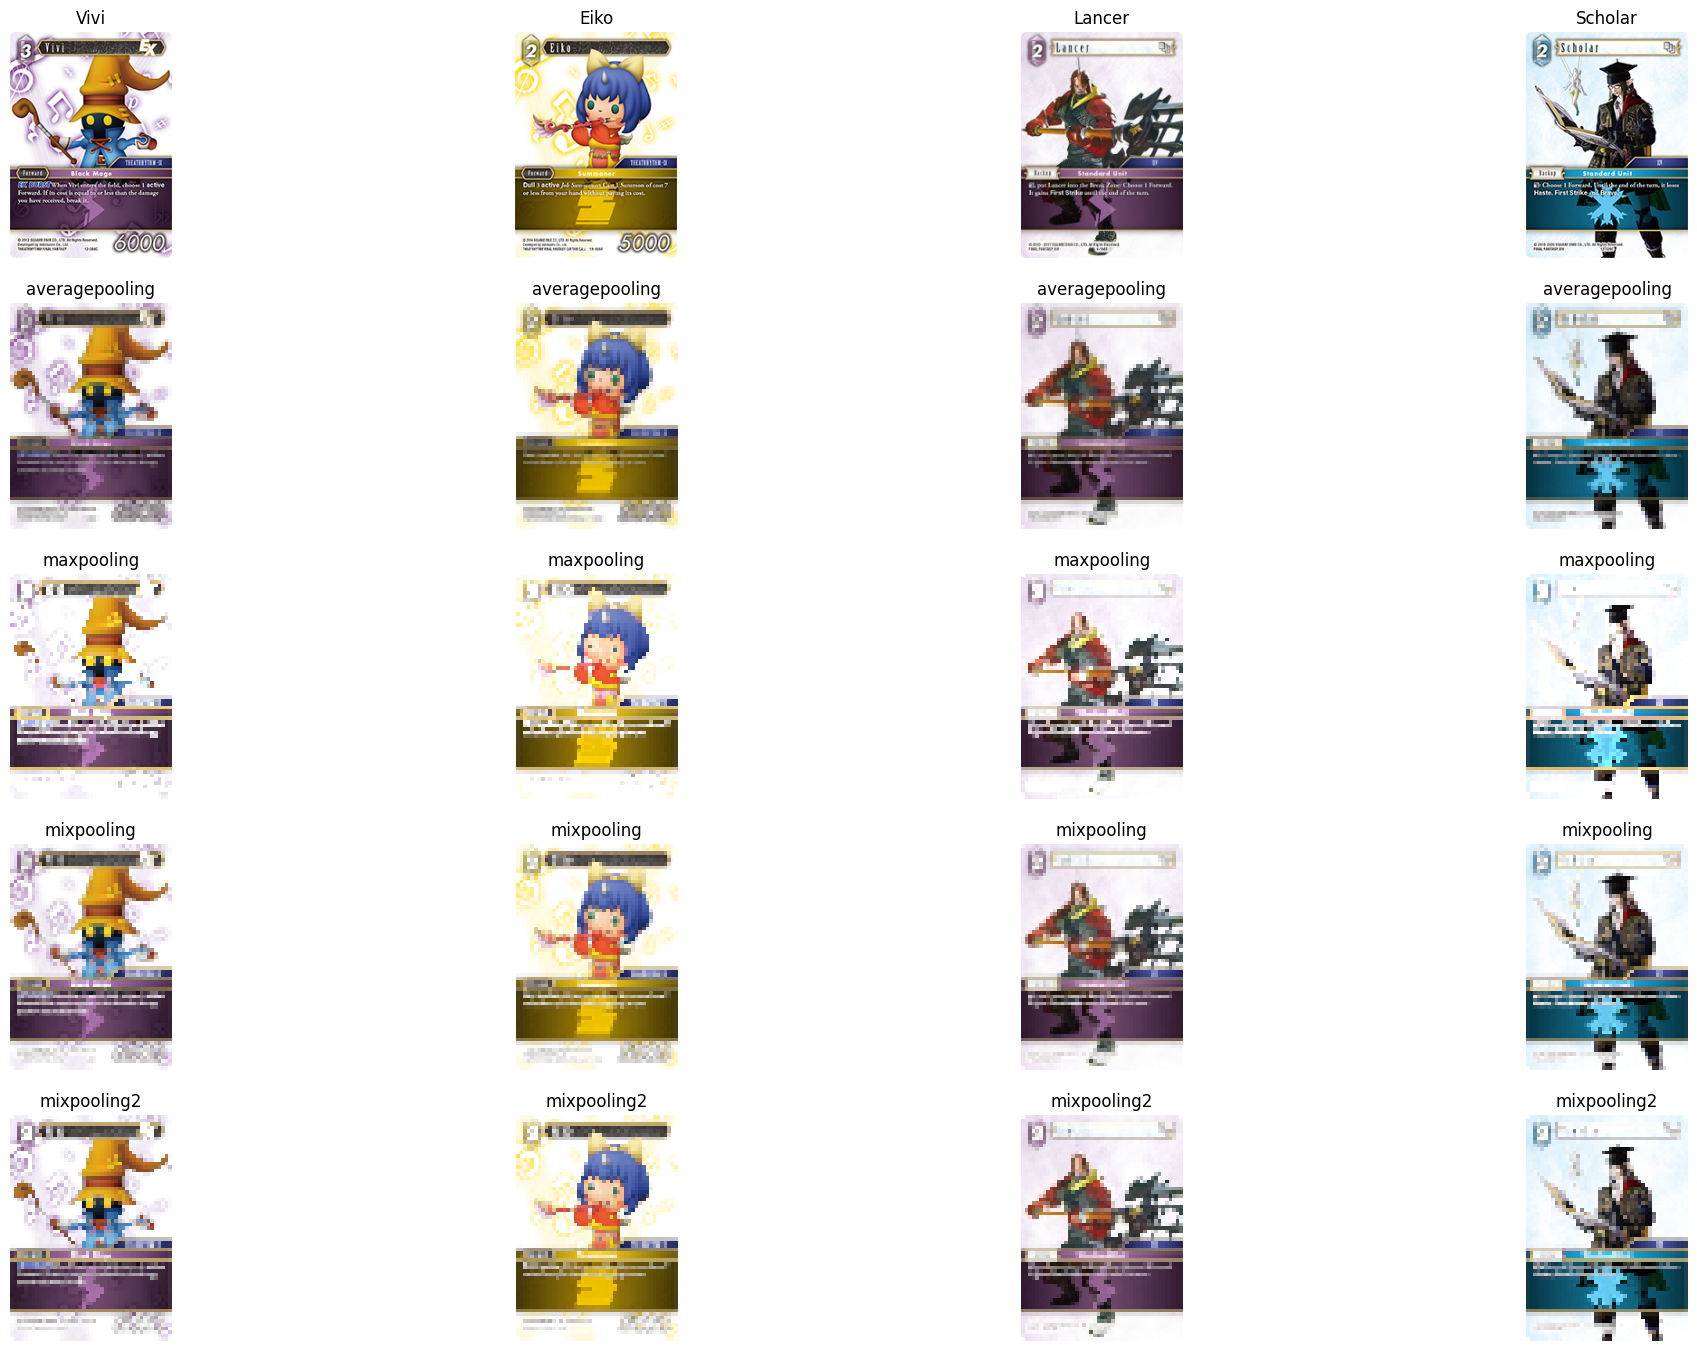

In [14]:
%matplotlib inline

import tensorflow as tf
from keras import layers
from skimage.io import imread
from matplotlib import pyplot as plt

from data.dataset import imagine_database

# pick a random images
df = imagine_database()

# Ignore by language
# df = df.query(f"~filename.str.contains('_eg')")  # English
df = df.query(f"~filename.str.contains('_fr')")  # French
df = df.query(f"~filename.str.contains('_es')")  # Spanish
df = df.query(f"~filename.str.contains('_it')")  # Italian
df = df.query(f"~filename.str.contains('_de')")  # German
df = df.query(f"~filename.str.contains('_jp')")  # Japanese

df = df.sample(4)
imgs = [imread(uri) for uri in df["filename"]]

fig = plt.figure(figsize=(25, 17))

for i, img in enumerate(imgs):
    fig.add_subplot(5, 4, i + 1)
    plt.axis('off')
    plt.imshow(img)
    plt.title(df.iloc[i]["name_en"])
        
images = layers.Rescaling(scale=1. / 255)(imgs)

avg_images = layers.AveragePooling2D(padding="same")(images)
avg_images = layers.AveragePooling2D(padding="same")(avg_images)
# avg_images = layers.UpSampling2D(interpolation="bilinear")(avg_images)
for i, img in enumerate(avg_images):
    fig.add_subplot(5, 4, i + 5)
    plt.axis('off')
    plt.imshow(img)
    plt.title("averagepooling")

max_images = layers.MaxPooling2D(padding="same")(images)
max_images = layers.MaxPooling2D(padding="same")(max_images)
# max_images = layers.UpSampling2D(interpolation="bilinear")(max_images)
for i, img in enumerate(max_images):
    fig.add_subplot(5, 4, i + 9)
    plt.axis('off')
    plt.imshow(img)
    plt.title("maxpooling")
    
mix_images = layers.MaxPooling2D(padding="same")(images)
mix_images = layers.AveragePooling2D(padding="same")(mix_images)
#mix_images = layers.UpSampling2D(interpolation="bilinear")(mix_images)
# mix_images = layers.UpSampling2D(interpolation="bilinear")(mix_images)
for i, img in enumerate(mix_images):
    fig.add_subplot(5, 4, i + 13)
    plt.axis('off')
    plt.imshow(img)
    plt.title("mixpooling")
    
mix_images2 = layers.AveragePooling2D(padding="same")(images)
mix_images2 = layers.MaxPooling2D(padding="same")(mix_images2)
# mix_images2 = layers.UpSampling2D(interpolation="bilinear")(mix_images2)
# mix_images2 = layers.UpSampling2D(interpolation="bilinear")(mix_images2)
for i, img in enumerate(mix_images2):
    fig.add_subplot(5, 4, i + 17)
    plt.axis('off')
    plt.imshow(img)
    plt.title("mixpooling2")